In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [100]:
data = {'GPA': [3.0, 3.7, 3.3, 2.5, 4.0, 3.2, 3.9, 3.0], 'Hours Studied': [2, 8, 3, 1, 12, 7, 9, 5]}

In [101]:
df = pd.DataFrame(data)

In [102]:
df.describe()

,GPA,Hours Studied
count,8.000000,8.000000
mean,3.325000,5.875000
std,0.511999,3.796145
min,2.500000,1.000000
25%,3.000000,2.750000
50%,3.250000,6.000000
75%,3.750000,8.250000
max,4.000000,12.000000


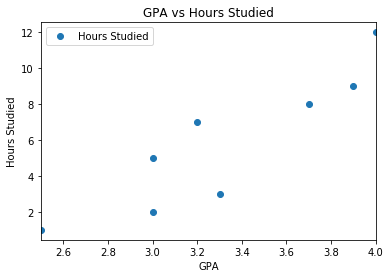

In [103]:
df.plot(x='GPA', y='Hours Studied',style='o')  
plt.title('GPA vs Hours Studied')  
plt.xlabel('GPA')  
plt.ylabel('Hours Studied')  
plt.show()

In [122]:
X = df['GPA'].values.reshape(-1,1)
y = df['Hours Studied'].values.reshape(-1,1)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=.6, random_state=0)

In [174]:
lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
#To retrieve the intercept:
print(lin_reg.intercept_)
#For retrieving the slope:
print(lin_reg.coef_)

[-29.95689655]
[[10.34482759]]


In [176]:
y_pred = lin_reg.predict(X_test)

In [177]:
df2 = pd.DataFrame({'Actual Hours Studied': y_test.flatten(), 'Predicted Hours Studied': y_pred.flatten()})
df2

,Actual Hours Studied,Predicted Hours Studied
0,5,1.077586
1,1,-4.094828
2,9,10.387931
3,7,3.146552


In [178]:
print("Mean squared Error ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error ",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean squared Error  14.529503567181933
Root Mean Squared Error  3.8117585924585957


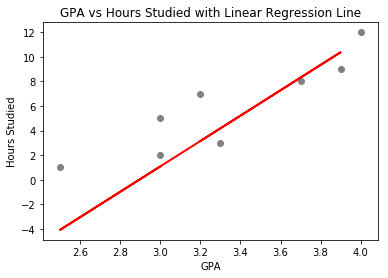

In [179]:
plt.scatter(df['GPA'], df['Hours Studied'],  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('GPA vs Hours Studied with Linear Regression Line')  
plt.xlabel('GPA')  
plt.ylabel('Hours Studied') 
plt.show()

### Results
#### This linear regression line is not as accurate as I would hope. You can see that the mean squared regression is much larger than expected. So, while there are values that are close to accurate like 5.0 hours actual study time the predicted value was fairly close at 4.14. As for other values you can see that the predicted needed study hours are way off.